### Program zliczający statystyki drużyny siatkarskiej z całego sezonu
#### Program wczytuje pliki z danymi dotyczącymi statystyk każdego elemetu gry z dedykowanych folderów (np. w folderze Przyjęcie są wszystkie pliki dotyczące przyjęć w wszystkich meczach). Następnie statystyki są sumowone i wizualizowane w tabelach i wykresach tak jak w programie dla pojedynczego meczu.

### Potrzebne biblioteki

In [ ]:
import csv
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
import os

### Wczytanie danych
Tworzone są listy tabel statystyk elementów z każdego meczu.

In [2]:
p = []
zgr = []
at = []
bl = []

for root,dirs,files in os.walk("Przyjęcie") :
    for file in files :
       if file.endswith(".csv") :
           p.append(pd.read_csv("Przyjęcie/"+file, sep=',', header=0))
            
for root,dirs,files in os.walk("Zagrywka") :
    for file in files :
       if file.endswith(".csv") :
           zgr.append(pd.read_csv("Zagrywka/"+file, sep=',', header=0))
            
for root,dirs,files in os.walk("Atak") :
    for file in files :
       if file.endswith(".csv") :
           at.append(pd.read_csv("Atak/"+file, sep=',', header=0))
            
for root,dirs,files in os.walk("Blok") :
    for file in files :
       if file.endswith(".csv") :
           bl.append(pd.read_csv("Blok/"+file, sep=',', header=0))

### Tworzenie tabel dla całego sezonu
W celu pozuskania wszystkich imion graczy posiadających dane w danej statystyce tworzone są listy nazw kolumn tabel z wszystkich meczów, a nastepnie bierze się tylko ich unikalne wartości. Następne listy to indeksy tabel dotyczących przyjęcia, zagrywki i ataku.  
Następnie tworzone są puste tabele dla statystyk sezonowych i sukcesywnie są uzupełniane przez sumowania statystyk zawodnika w koljenych meczach.

In [3]:
p_players = []
zgr_players = []
at_players = []
bl_players = []

for i in range(len(p)) :
    p_players += list(p[i].columns)
    zgr_players += list(zgr[i].columns)
    at_players += list(at[i].columns)
    
p_players = list(np.unique(p_players))
zgr_players = list(np.unique(zgr_players))
at_players = list(np.unique(at_players))

idx_p = ["Wszystkie", "Perfekcyjne", "Dobre", "Neutralne", "Złe", "Błędy", "% Pozytywnego", "% Błędów", "WSP"]
idx_zgr = ["Wszystkie", "Asy", "Dobre", "Neutralne", "Błędy", "% Pozytywnej", "% Błędów", "WSP"]
idx_at = ["Wszystkie", "Punktowy", "Wymuszony", "Nieskończony", "Błąd", "Zablokowany", "% Skuteczność", "% Dobrego ataku", "% Błędów", "WSP"]

p1 = pd.DataFrame(0, columns=p_players, index=idx_p)
zgr1 = pd.DataFrame(0, columns=zgr_players, index=idx_zgr)
at1 = pd.DataFrame(0, columns=at_players, index=idx_at)

for i in range(len(p)) :
    for col in p[i].columns :
        for j in range(6) :
            p1[col][j] += p[i][col][j]
            
    for col in zgr[i].columns :
        for j in range(5) :
            zgr1[col][j] += zgr[i][col][j]
            
    for col in at[i].columns :
        for j in range(6) :
            at1[col][j] += at[i][col][j]
        
                
for i in range(len(bl)) :
    bl_players += list(bl[i].columns)
        
bl_players = list(np.unique(bl_players))
idx_bl = ["Punktowe", "Wybloki"]
bl1 = pd.DataFrame(0, columns=bl_players, index=idx_bl)

for i in range(len(bl)) :
    for col in bl[i].columns :
        for j in range(2) :
            bl1[col][j] += bl[i][col][j]

### Wyliczanie statystyk procentowych
Procenty pozytywnych i negatywnych zagrań są wyliczane tak samo jak dla pojedynczego meczu.  
W celu poprawy przejrzystości wykresów, do pierwszych dwóch wchodzi 5 zawodników najczęściej pojawiających się w danym elemencie, a reszta jest sumowana i przedstawiana jako dopełnienie reszty zawodników.

### Przyjęcie

In [4]:
suma_w_p = p1.iloc[0].sum()

p1.iloc[6] = round((p1.iloc[1]+p1.iloc[2]) / p1.iloc[0]*100, 1)
p1.iloc[7] = round((p1.iloc[5]+p1.iloc[4]) / p1.iloc[0]*100, 1)
p1.iloc[8] = round((3*p1.iloc[1] + 2*p1.iloc[2] + 0.25*p1.iloc[3] - p1.iloc[4] - 4*p1.iloc[5]+0.5)*2/7/suma_w_p*100, 2)
p1 = p1.sort_values(by=p1.index[0], axis=1, ascending=False)   

top_p = p1.iloc[:6, :5]
top_p["Inni"] = p1.iloc[:6, 5:].sum(axis=1)

p1

,Misza,Tomek,Wiktor,Bajer,Loszek,Paulina,Kelly,Maksym,Daryna,Michał F,Michał T,Michał W,Krzysiek,Karolina,Łukasz,Żenia
Wszystkie,118.00,99.00,60.0,57.00,36.00,35.0,17.00,6.00,3.00,3.00,3.00,3.00,2.00,1.00,1.00,1.00
Perfekcyjne,21.00,25.00,12.0,13.00,7.00,5.0,2.00,1.00,0.00,0.00,2.00,1.00,1.00,0.00,0.00,1.00
Dobre,29.00,20.00,22.0,13.00,3.00,8.0,4.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00,0.00
Neutralne,23.00,17.00,12.0,19.00,6.00,12.0,3.00,2.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00
Złe,23.00,18.00,9.0,6.00,11.00,6.0,6.00,1.00,1.00,2.00,1.00,0.00,0.00,1.00,1.00,0.00
Błędy,22.00,19.00,5.0,6.00,9.00,4.0,2.00,2.00,1.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00
% Pozytywnego,42.40,45.50,56.7,45.60,27.80,37.1,35.30,16.70,0.00,0.00,66.70,66.70,100.00,0.00,0.00,100.00
% Błędów,38.10,37.40,23.3,21.10,55.60,28.6,47.10,50.00,66.70,100.00,33.30,0.00,0.00,100.00,100.00,0.00
WSP,1.04,1.65,3.5,2.58,-1.16,0.8,0.08,-0.32,-0.27,-0.35,0.35,0.37,0.35,-0.03,-0.03,0.22


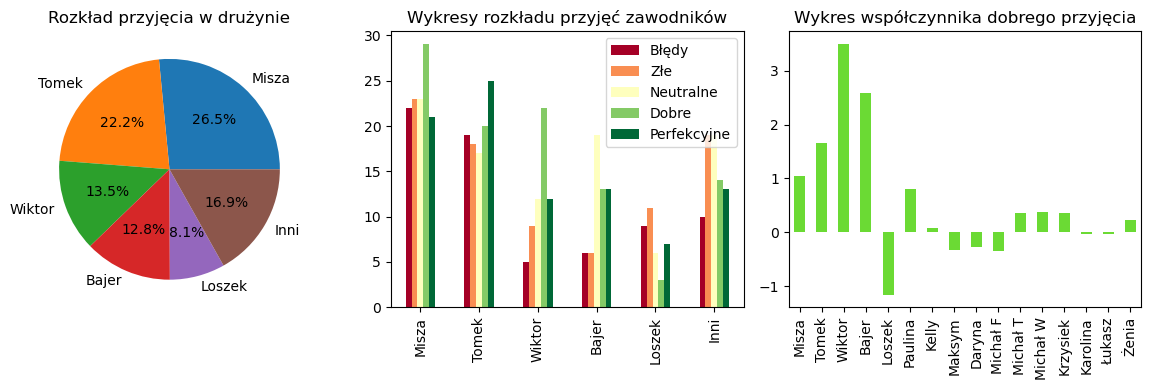

In [5]:
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Pieplot dla rozkładu przyjęć
axs[0].pie(top_p.loc["Wszystkie"], labels = top_p.columns, autopct='%1.1f%%')
axs[0].set_title('Rozkład przyjęcia w drużynie')
axs[0].set_label("")

#Zestawienie rang przyjęć każdego zawodnika na jednym wykresie
top_p.loc[["Błędy", "Złe", "Neutralne", "Dobre", "Perfekcyjne"]].T.plot(kind="bar", ax=axs[1], colormap='RdYlGn')
axs[1].set_title('Wykresy rozkładu przyjęć zawodników')
axs[1].legend(loc='upper right')

#Wykres słupkowy WSP przyjęcia
p1.loc["WSP"].plot(kind="bar", ax=axs[2], color="#6BDA34")
axs[2].set_title('Wykres współczynnika dobrego przyjęcia')

# Dostosowanie układu
plt.tight_layout()

# Pokaż wykres
plt.show()

### Zagrywka

In [6]:
suma_w_z = zgr1.iloc[0].sum()

zgr1.iloc[5] = round((zgr1.iloc[1]+zgr1.iloc[2]) / zgr1.iloc[0]*100, 1)
zgr1.iloc[6] = round(zgr1.iloc[4] / zgr1.iloc[0]*100, 1)
zgr1.iloc[7] = round((4*zgr1.iloc[1] + 2*zgr1.iloc[2] + zgr1.iloc[3] - 3*zgr1.iloc[4] - 0.5)*2/7/suma_w_z*100, 2)
zgr1 = zgr1.sort_values(by=zgr1.index[0], axis=1, ascending=False)   

top_zgr = zgr1.iloc[:5, :5]
top_zgr["Inni"] = zgr1.iloc[:5, 5:].sum(axis=1)

zgr1

,Michał T,Żenia,Tomek,Kelly,Wiktor,Bajer,Julian,Michał F,Tadek,Filip,Loszek,Krzysiek,Maksym,Michał W,Łukasz,Wiktor P,Misza
Wszystkie,133.00,103.00,96.00,51.00,44.00,41.00,26.00,26.00,25.00,23.00,21.00,18.00,9.00,7.00,4.00,2.00,1.00
Asy,7.00,14.00,20.00,8.00,10.00,2.00,5.00,6.00,1.00,2.00,2.00,1.00,2.00,0.00,1.00,0.00,0.00
Dobre,49.00,34.00,33.00,13.00,11.00,10.00,8.00,4.00,6.00,5.00,7.00,7.00,3.00,0.00,0.00,1.00,0.00
Neutralne,66.00,39.00,26.00,19.00,8.00,26.00,9.00,6.00,14.00,13.00,9.00,8.00,1.00,7.00,2.00,0.00,0.00
Błędy,11.00,16.00,17.00,11.00,15.00,3.00,4.00,10.00,4.00,3.00,3.00,2.00,3.00,0.00,1.00,1.00,1.00
% Pozytywnej,42.10,46.60,55.20,41.20,47.70,29.30,50.00,38.50,28.00,30.40,42.90,44.40,55.60,0.00,25.00,50.00,0.00
% Błędów,8.30,15.50,17.70,21.60,34.10,7.30,15.40,38.50,16.00,13.00,14.30,11.10,33.30,0.00,25.00,50.00,100.00
WSP,7.19,5.19,5.46,1.97,1.11,2.02,1.47,0.34,0.79,0.98,0.98,0.88,0.25,0.29,0.11,-0.07,-0.16


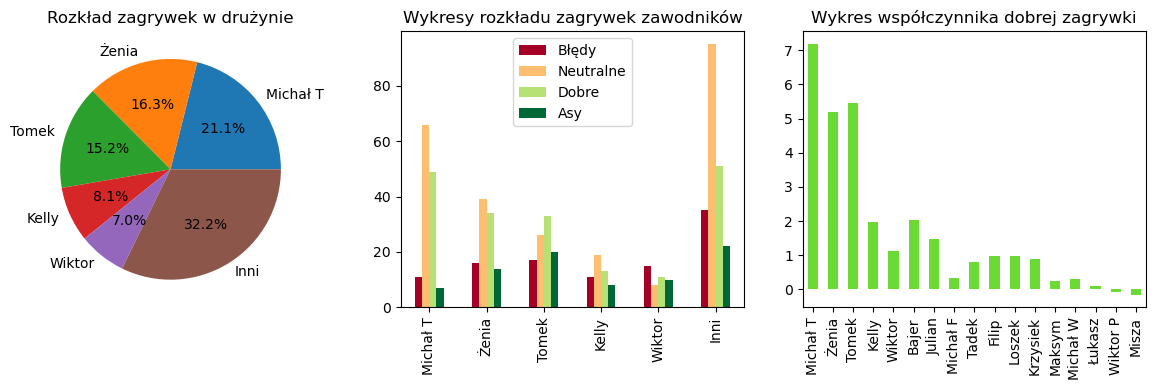

In [7]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

#Wykres kołowy rozkładu sumy zagrywek na zawodników
axs[0].pie(top_zgr.loc["Wszystkie"], labels = top_zgr.columns, autopct='%1.1f%%')
axs[0].set_title('Rozkład zagrywek w drużynie')

#Wykres rozkładu poziomu zagrywek zawodników
top_zgr.loc[["Błędy", "Neutralne", "Dobre", "Asy"]].T.plot(kind="bar", ax = axs[1], colormap='RdYlGn')
axs[1].set_title('Wykresy rozkładu zagrywek zawodników')

#Wykres współczynnika poprawności zagrywki
zgr1.loc["WSP"].plot(kind="bar", ax = axs[2], color="#6BDA34")
axs[2].set_title('Wykres współczynnika dobrej zagrywki')

plt.tight_layout()
plt.show()

### Atak

In [8]:
suma_w_a = at1.iloc[0].sum()

at1.iloc[6] = round(at1.iloc[1] / at1.iloc[0]*100, 1)
at1.iloc[7] = round((at1.iloc[1] + at1.iloc[2]) / at1.iloc[0]*100, 1)
at1.iloc[8] = round((at1.iloc[4] + at1.iloc[5]) / at1.iloc[0]*100, 1)
at1.iloc[9] = round((2*at1.iloc[1] + 1.5*at1.iloc[2] - 3*(at1.iloc[4] + at1.iloc[5]) + 0.5)*2/5/suma_w_z*100, 2)
at1 = at1.sort_values(by=at1.index[0], axis=1, ascending=False)   

top_at = at1.iloc[:6, :5]
top_at["Inni"] = at1.iloc[:6, 5:].sum(axis=1)

at1

,Żenia,Tomek,Wiktor,Bajer,Kelly,Michał F,Michał T,Krzysiek,Loszek,Filip,Michał W,Julian,Tadek,Maksym,Misza,Łukasz,Wiktor P
Wszystkie,181.0,127.00,93.00,53.00,44.00,24.00,21.0,20.0,18.00,15.00,12.00,9.00,7.00,4.00,4.00,2.00,1.00
Punktowy,84.0,54.00,41.00,30.00,16.00,11.00,5.0,6.0,8.00,10.00,4.00,5.00,0.00,2.00,3.00,0.00,1.00
Wymuszony,33.0,23.00,19.00,4.00,10.00,4.00,5.0,4.0,4.00,1.00,2.00,1.00,0.00,1.00,0.00,0.00,0.00
Nieskończony,26.0,20.00,21.00,10.00,10.00,5.00,5.0,7.0,1.00,3.00,1.00,2.00,7.00,0.00,0.00,1.00,0.00
Błąd,26.0,18.00,11.00,4.00,7.00,4.00,6.0,2.0,3.00,1.00,4.00,0.00,0.00,0.00,1.00,1.00,0.00
Zablokowany,12.0,12.00,1.00,5.00,1.00,0.00,0.0,1.0,2.00,0.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00
% Skuteczność,46.4,42.50,44.10,56.60,36.40,45.80,23.8,30.0,44.40,66.70,33.30,55.60,0.00,50.00,75.00,0.00,100.00
% Dobrego ataku,64.6,60.60,64.50,64.20,59.10,62.50,47.6,50.0,66.70,73.30,50.00,66.70,0.00,75.00,75.00,0.00,100.00
% Błędów,21.0,23.60,12.90,17.00,18.20,16.70,28.6,15.0,27.80,6.70,41.70,11.10,0.00,25.00,25.00,50.00,0.00
WSP,6.6,3.37,4.76,2.51,1.49,1.05,0.0,0.6,0.48,1.21,-0.22,0.57,0.03,0.19,0.22,-0.16,0.16


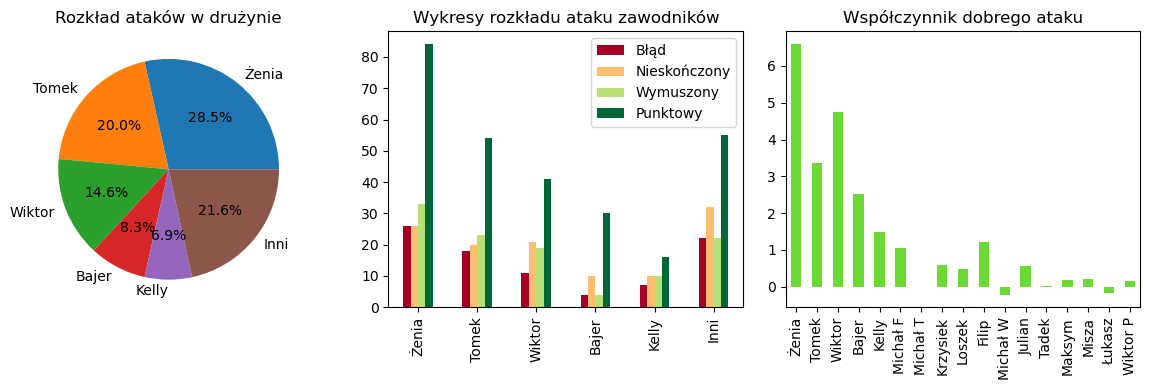

In [9]:
fig, axs = plt.subplots(1, 3, figsize=(12,4))

#Wykres rozkaładu sumy ataków na zawodników
axs[0].pie(top_at.loc["Wszystkie"], labels = top_at.columns, autopct='%1.1f%%')
axs[0].set_title('Rozkład ataków w drużynie')

#Wykres rozkładu skuteczności ataków każdego zawodnika
top_at.loc[["Błąd", "Nieskończony", "Wymuszony", "Punktowy"]].T.plot(kind="bar", ax = axs[1], colormap='RdYlGn')
axs[1].set_title('Wykresy rozkładu ataku zawodników')

#Współczynnik dobrego ataku
at1.loc["WSP"].plot(kind="bar", ax=axs[2], color="#6BDA34")
axs[2].set_title("Współczynnik dobrego ataku")

plt.tight_layout()
plt.show()

### Blok

In [10]:
bl1 = bl1.sort_values(by=bl1.index[0], axis=1, ascending=False)
bl1

,Kelly,Żenia,Tomek,Michał F,Krzysiek,Michał T,Bajer,Wiktor,Loszek,Michał W,Łukasz,Maksym,Filip,Julian
Punktowe,14,12,8,7,6,6,3,3,2,2,2,1,0,0
Wybloki,4,6,4,2,2,5,0,1,2,0,0,0,1,4


### Zbiorcze wykresy i tabele
Tak samo jak dla pojedynczego meczu, zostają utworzone plansze z wszystkimi wykresami i tabelami, a następnie są zapisywane do plików JPEG i PDF

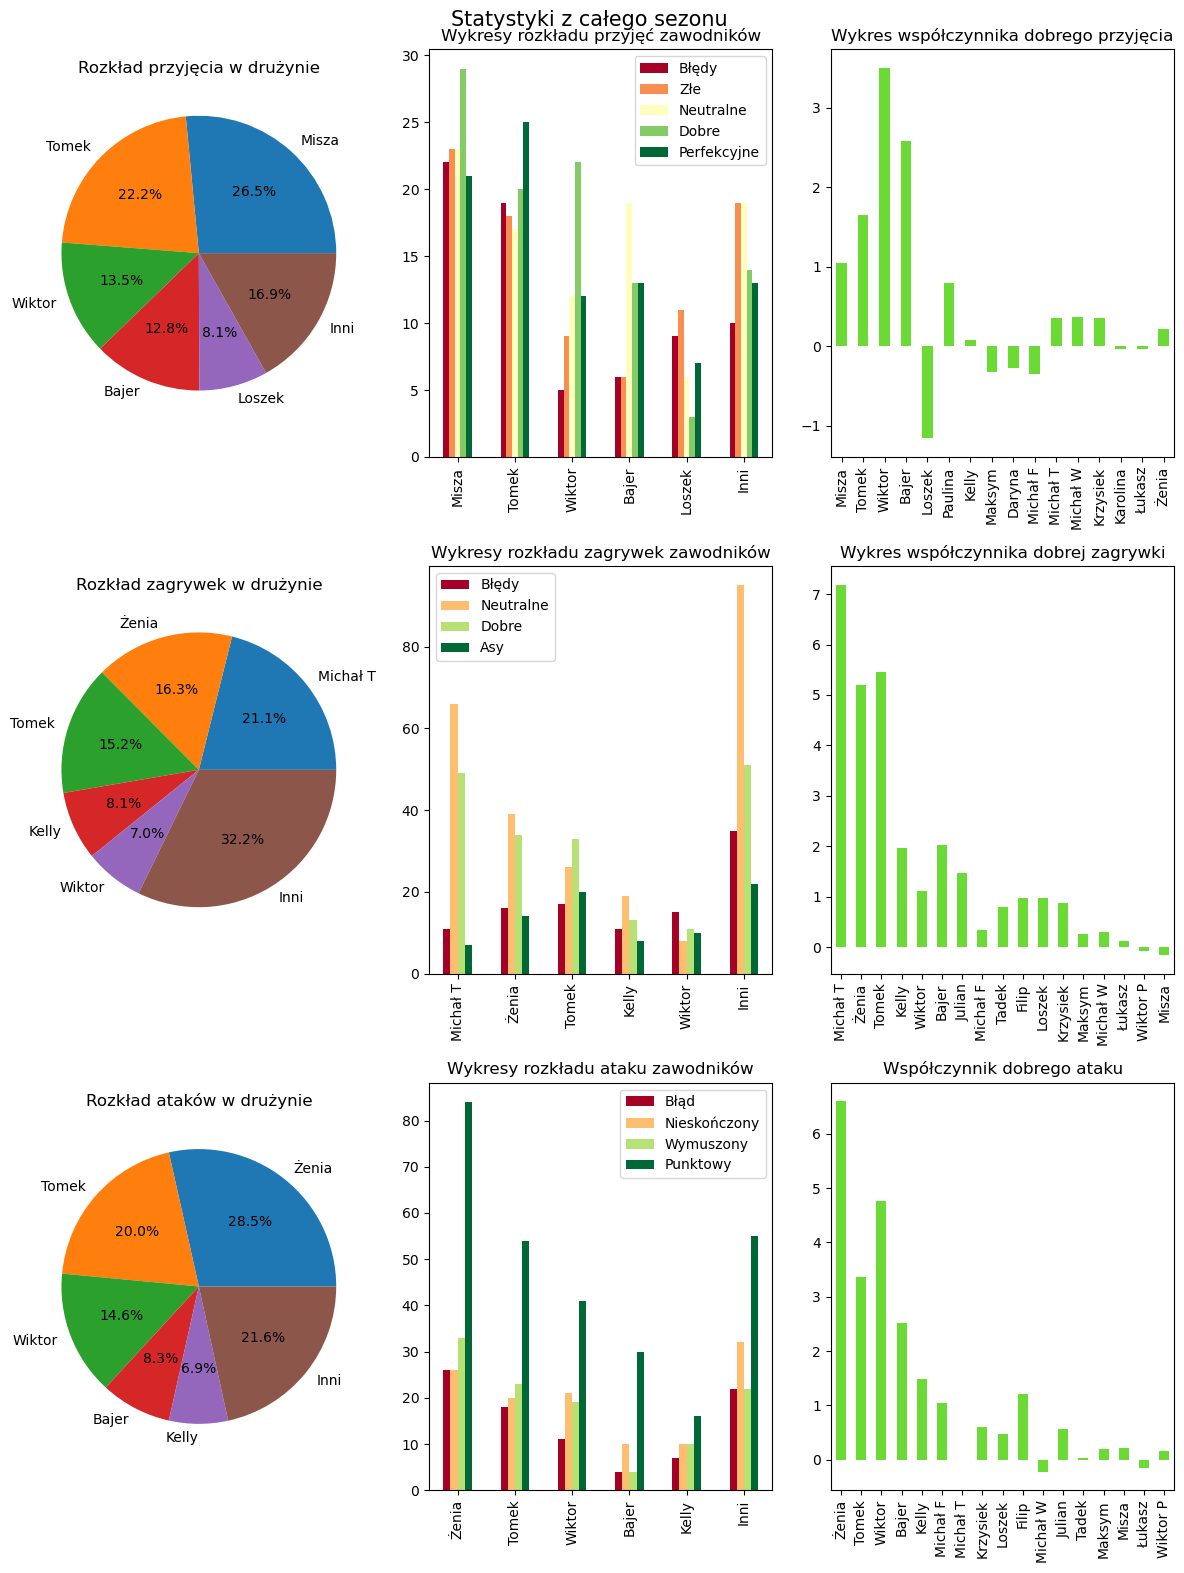

In [11]:
#Plik z zapisem do PDF
pp = PdfPages("Wszystko.pdf")

fig, axs = plt.subplots(3, 3, figsize=(12,16))

# Pieplot dla rozkładu przyjęć
axs[0,0].pie(top_p.loc["Wszystkie"], labels = top_p.columns, autopct='%1.1f%%')
axs[0,0].set_title('Rozkład przyjęcia w drużynie')

#Zestawienie rang przyjęć każdego zawodnika na jednym wykresie
top_p.loc[["Błędy", "Złe", "Neutralne", "Dobre", "Perfekcyjne"]].T.plot(kind="bar", ax=axs[0,1], colormap='RdYlGn')
axs[0,1].set_title('Wykresy rozkładu przyjęć zawodników')

#Wykres słupkowy WSP przyjęcia
p1.loc["WSP"].plot(kind="bar", ax=axs[0,2], color="#6BDA34")
axs[0,2].set_title('Wykres współczynnika dobrego przyjęcia')

#Wykres kołowy rozkładu sumy zagrywek na zawodników
axs[1,0].pie(top_zgr.loc["Wszystkie"], labels = top_zgr.columns, autopct='%1.1f%%')
axs[1,0].set_title('Rozkład zagrywek w drużynie')

#Wykres rozkładu poziomu zagrywek zawodników
top_zgr.loc[["Błędy", "Neutralne", "Dobre", "Asy"]].T.plot(kind="bar", ax = axs[1,1], colormap='RdYlGn')
axs[1,1].set_title('Wykresy rozkładu zagrywek zawodników')

#Wykres współczynnika poprawności zagrywki
zgr1.loc["WSP"].plot(kind="bar", ax = axs[1,2], color="#6BDA34")
axs[1,2].set_title('Wykres współczynnika dobrej zagrywki')

#Wykres rozkaładu sumy ataków na zawodników
axs[2,0].pie(top_at.loc["Wszystkie"], labels = top_at.columns, autopct='%1.1f%%')
axs[2,0].set_title('Rozkład ataków w drużynie')

#Wykres rozkładu skuteczności ataków każdego zawodnika
top_at.loc[["Błąd", "Nieskończony", "Wymuszony", "Punktowy"]].T.plot(kind="bar", ax = axs[2,1], colormap='RdYlGn')
axs[2,1].set_title('Wykresy rozkładu ataku zawodników')

#Współczynnik dobrego ataku
at1.loc["WSP"].plot(kind="bar", ax=axs[2,2], color="#6BDA34")
axs[2,2].set_title("Współczynnik dobrego ataku")

plt.suptitle("Statystyki z całego sezonu", size=15)


plt.tight_layout()
plt.savefig("Wykresy.jpeg")
pp.savefig(fig, bbox_inches='tight')

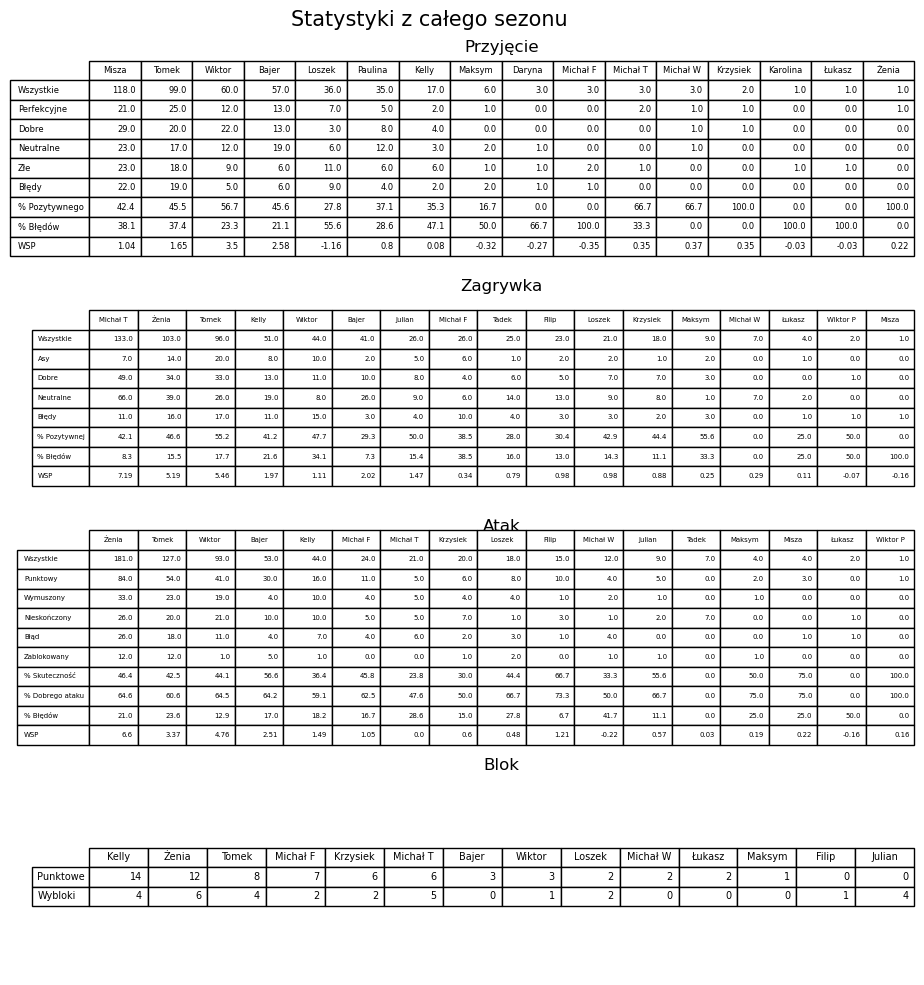

In [12]:
fig, axs = plt.subplots(4,1, figsize=(10,10))

axs[0].axis('off')
axs[0].table(cellText=p1.values, colLabels=p1.columns, rowLabels=idx_p, loc='center')
axs[0].set_title("Przyjęcie")

axs[1].axis('off')
axs[1].table(cellText=zgr1.values, colLabels=zgr1.columns, rowLabels=idx_zgr, loc='center')
axs[1].set_title("Zagrywka")

axs[2].axis('off')
axs[2].table(cellText=at1.values, colLabels=at1.columns, rowLabels=idx_at, loc='center')
axs[2].set_title("Atak")

axs[3].axis('off')
axs[3].table(cellText=bl1.values, colLabels=bl1.columns, rowLabels=["Punktowe", "Wybloki"], loc='center')
axs[3].set_title("Blok")

plt.suptitle("Statystyki z całego sezonu", size=15)

plt.tight_layout()
plt.savefig("Statystyki.jpeg")

pp.savefig(fig, bbox_inches='tight')
pp.close()